Vamos a trabajar con el siguiente dataset que contiene información personal sobre los clientes de un supermercado: 
Puede ser descargado de la siguiente base de datos: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Importación de datos y análisis básico

## Creamos un notebook que permita leer el archivo csv:


In [66]:
file_mc= "C:/Users/maric/Documents/Python Scripts/marketing_campaign.csv"
file_mc

'C:/Users/maric/Documents/Python Scripts/marketing_campaign.csv'

In [67]:
data = pd.read_csv(file_mc,sep="\t",header=0)

## Hacemos un análisis preliminar de las variables:

In [68]:
# Para ello utilizaremos primero la librería panda, en el caso de no tenerla instalada usaremos el comando pip install panda
import pandas as pd

In [69]:
# Calculamos el número de observaciones:
print ('Número de observaciones:')
len(data)

Número de observaciones:


2240

In [70]:
# Calculamos el número de variables:
print ('Número de variables:')
len(data.columns)

Número de variables:


29

In [71]:
# Calculamos el tipo de variables qué tenemos:
data = pd.read_csv(file_mc,sep="\t",header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [72]:
# Comprobamos si tenemos algún NAN. Para ello necesitamos la librería missingno:
import missingno as msno

<AxesSubplot:>

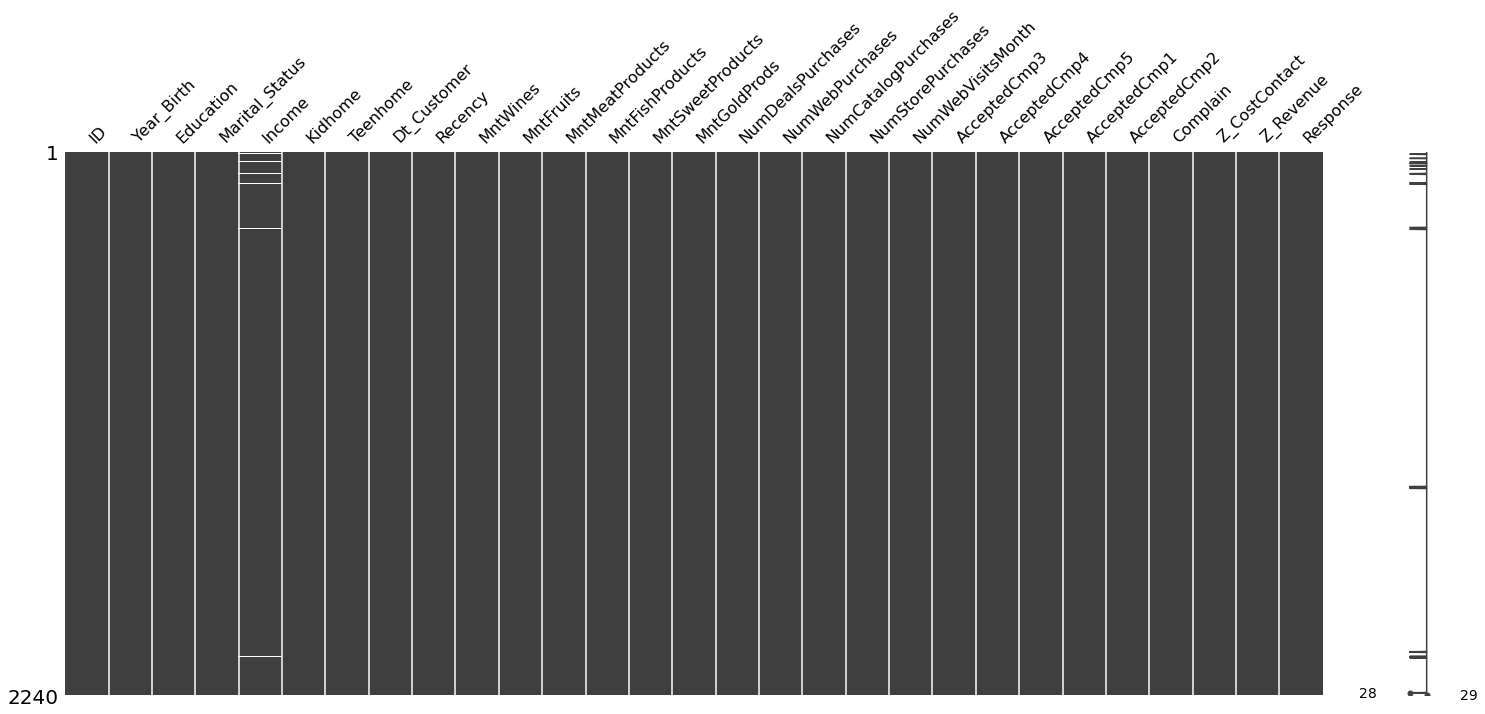

In [73]:
msno.matrix(data)

In [74]:
# Hemos visto que tenemos algunos datos NAN dentro de la variable Income. Decidimos eliminar estas observaciones:
data = data.dropna()

In [75]:
# Finalmente observamos las primeras filas del conjunto de datos resultantes:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**En este caso nuestras variables respuestas vendrán dadas por las Mnt que indican la cantidad de vino, pescado, carne, fruta, dulces y productos oro consumidos. Pero esta empresa también podría desear incrementar el número de compras a través de la web, o incrementar el número de aceptación de las ofertas por parte de los consumidores. Por lo que tendríamos que estudiar dichas variables**

## Descripción de variables:

In [76]:
#Identificación de las variables cualitativas
tipos_variables = pd.DataFrame(data.dtypes)
var_cual = data.columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,Education
1,Marital_Status
2,Dt_Customer


In [77]:
# Variables cuantitativas:
var_num = data.columns[(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,ID
1,Year_Birth
2,Income
3,Kidhome
4,Teenhome
5,Recency
6,MntWines
7,MntFruits
8,MntMeatProducts
9,MntFishProducts


# Estadística descriptiva: 

## Descripción de una o más variables numéricas:

In [78]:
data[var_num].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Vemos que por ejemplo el consumo medio en vino es muchísimo mayor que en el resto de productos. O vemos que el cliente tiene mayor posibilidades de aceptar las ofertas a partir de la tercera campaña, en vez de en la primera o la segunda.**

In [79]:
#Descripción de una variable cuantativa de forma gráfica. Vamos a ver por ejemplo cuántos días hace desde la última compra
# Para ello necesitamos la librería matplotlib y seaborn:

import matplotlib.pyplot as plt
import seaborn as sns 

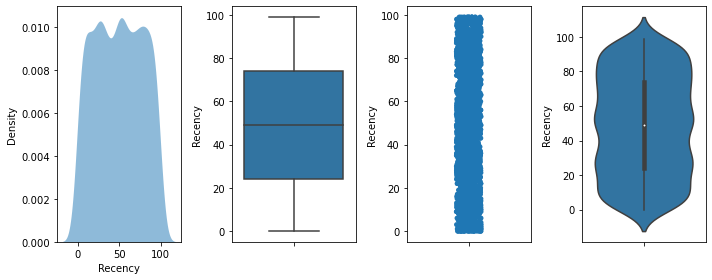

In [80]:
fig,axs = plt.subplots (ncols=4, figsize=(10,4))
sns.kdeplot(
    data=data, x = 'Recency',
    fill = True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y='Recency', ax=axs[1])
sns.stripplot(y='Recency', data=data2, ax=axs[2])
sns.violinplot(data=data, y='Recency', ax=axs[3])
fig.tight_layout()
plt.show()

**Comprobamos que efectivamente hay una distribución muy similar de los días que han pasado desde los últimos días de la compra**

**Podemos realizar este análisis gráfico para todas las variables cuantitativas:**

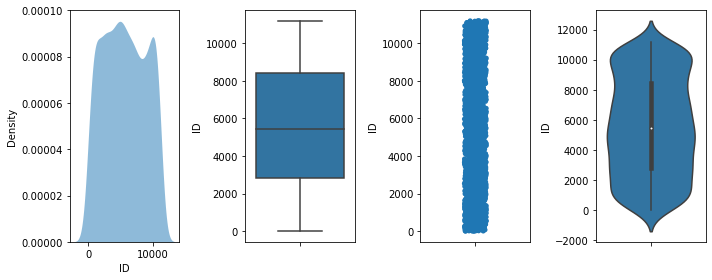

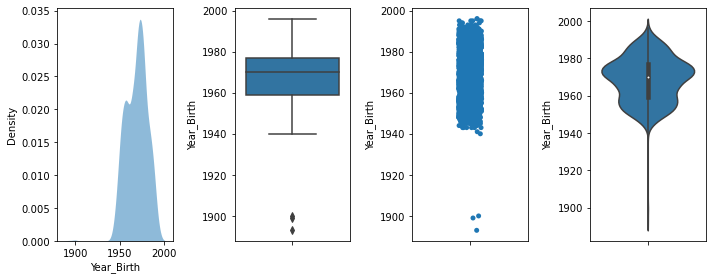

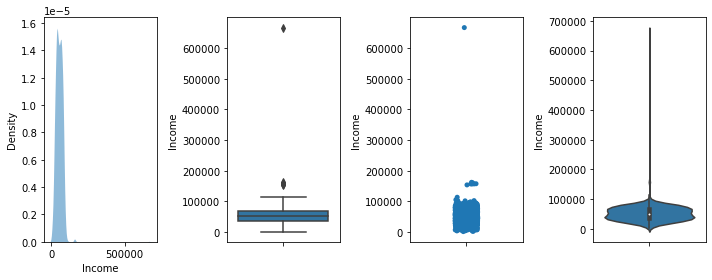

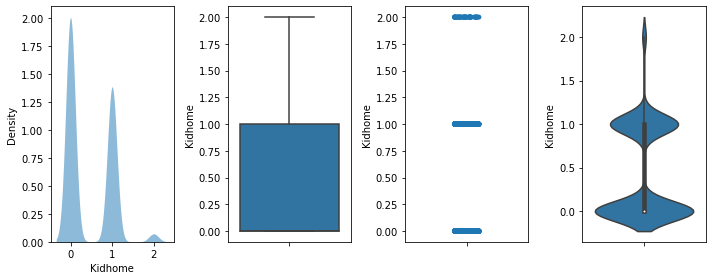

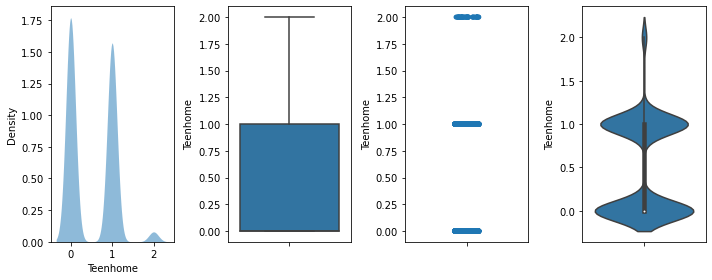

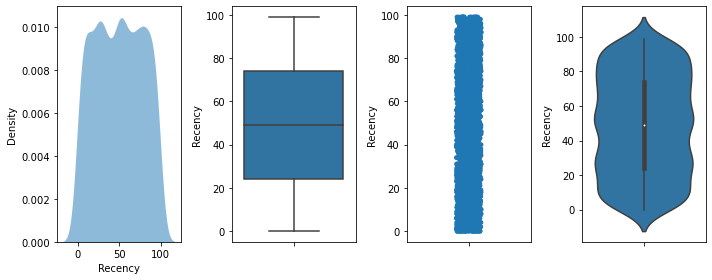

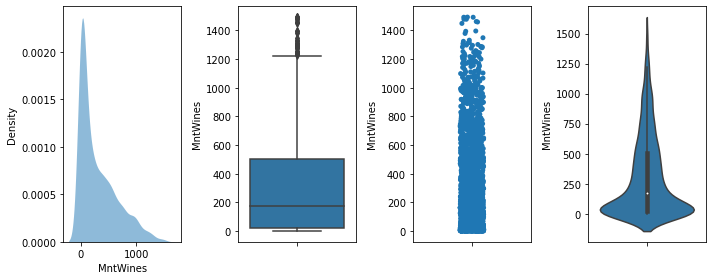

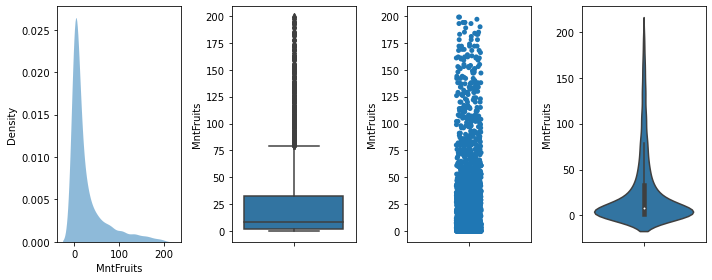

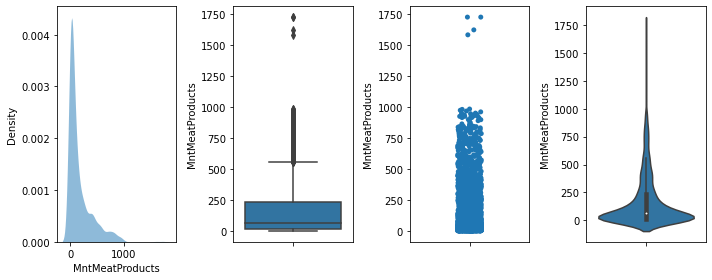

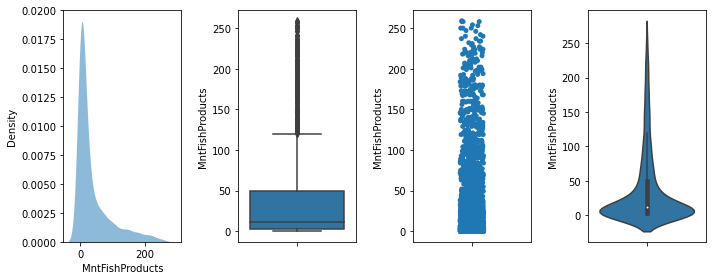

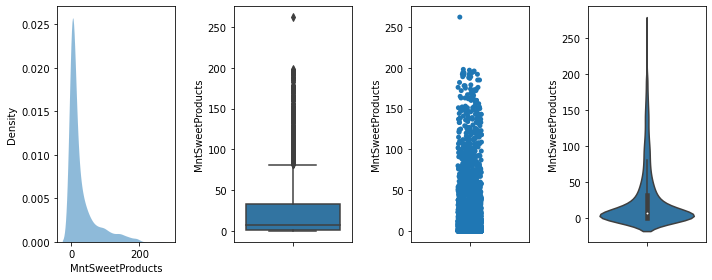

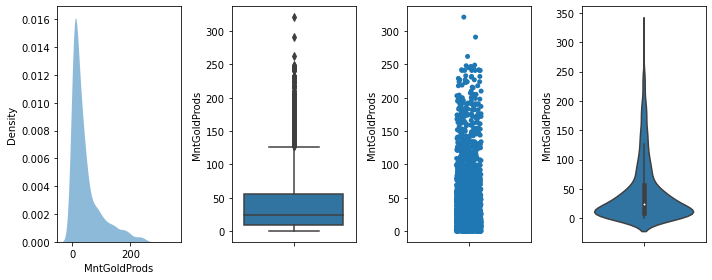

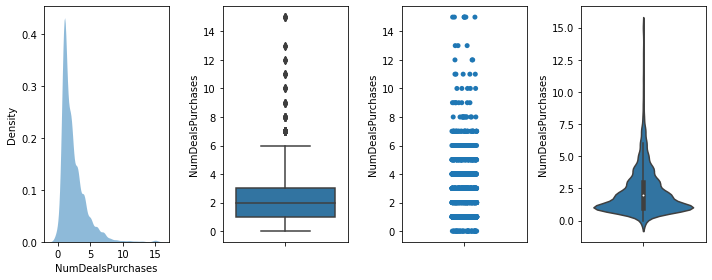

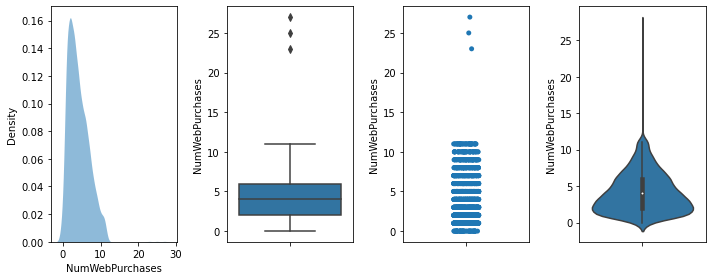

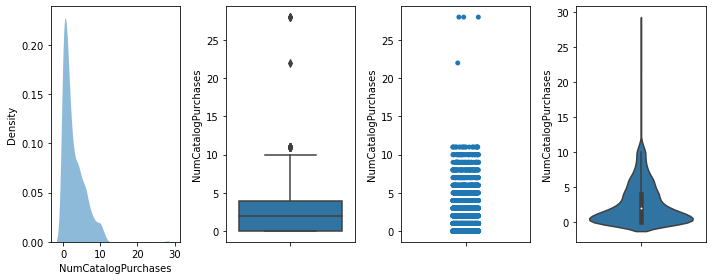

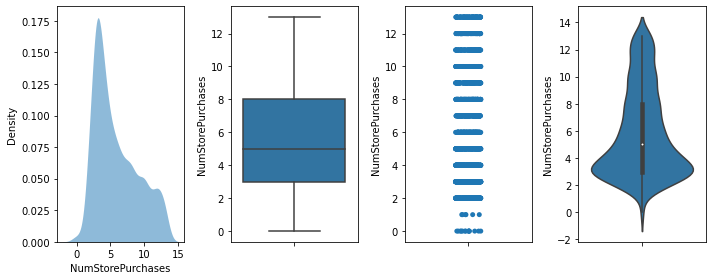

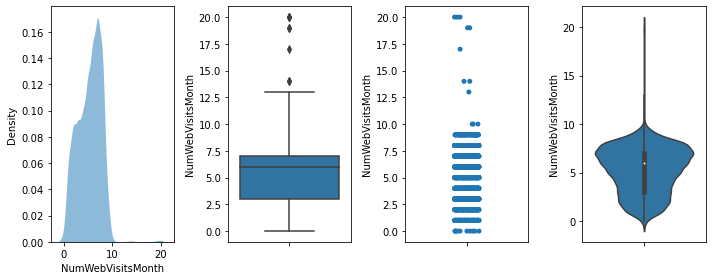

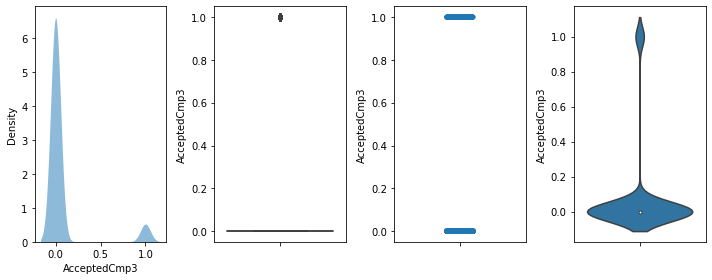

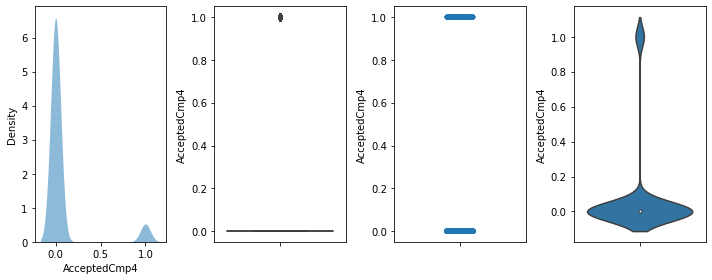

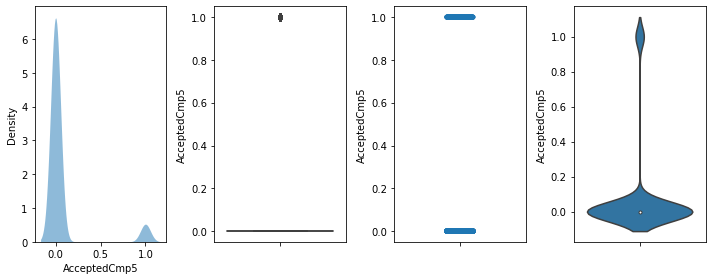

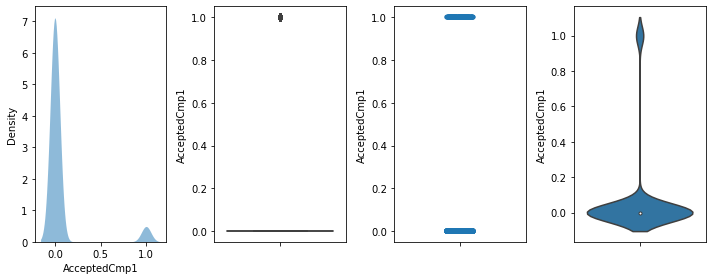

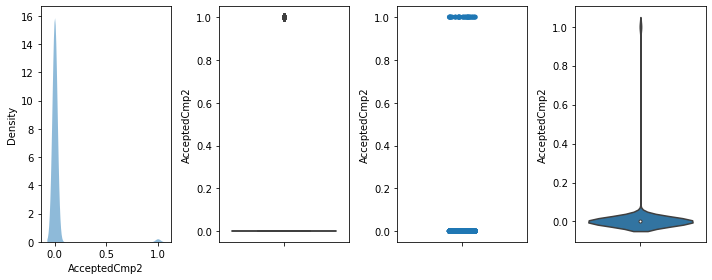

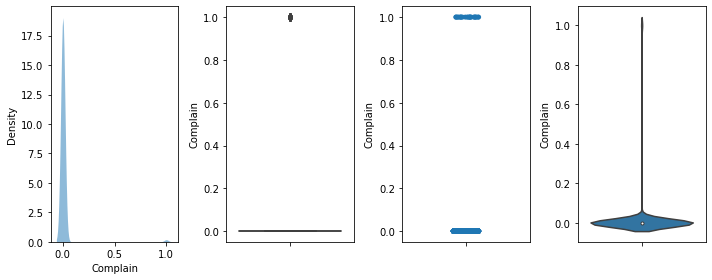

C:\Users\maric\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


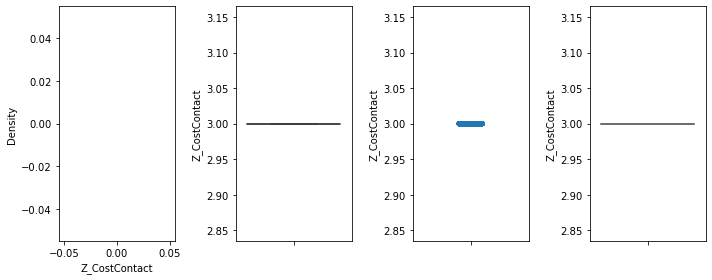

C:\Users\maric\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


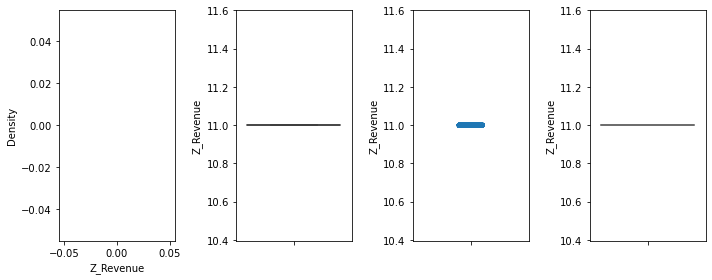

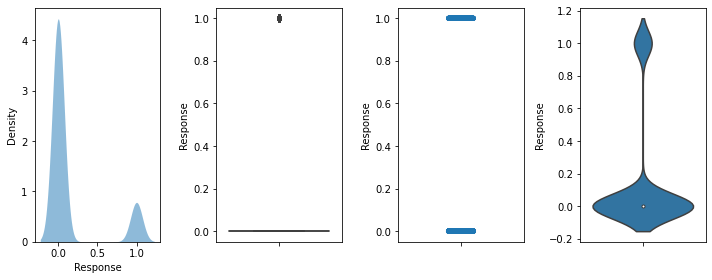

In [82]:
for i in var_num: 
    fig,axs = plt.subplots (ncols=4, figsize=(10,4))
    sns.kdeplot(
        data=data, x = i,
        fill = True, common_norm=False, palette="crest",
        alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i, ax=axs[1])
    sns.stripplot(y=i, data=data, ax=axs[2])
    sns.violinplot(data=data, y=i, ax=axs[3])
    fig.tight_layout()
    plt.show()

## Descripción de una o más variables cualitativas:

In [84]:
# Tabla de frecuencias absolutas, en este caso del nivel de educación:
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

**En este caso podemos comprobar que el mayor número de personas que compran en este supermercado tienen una formación de graduación:**

In [85]:
# Vamos a calcular la tabla de frecuencias relativas en este caso del status marital:
pct= data["Marital_Status"].value_counts(normalize=True).reset_index().rename({'index':"output","output":'percent'}, axis=1)
pct

,output,Marital_Status
0,Married,0.386733
1,Together,0.258574
2,Single,0.212545
3,Divorced,0.104693
4,Widow,0.034296
5,Alone,0.001354
6,YOLO,0.000903
7,Absurd,0.000903


**Vemos que el mayor porcentaje es alcanzado por personas casadas seguida de parejas no casadas, siendo los mayores compradores de este supermercado:**

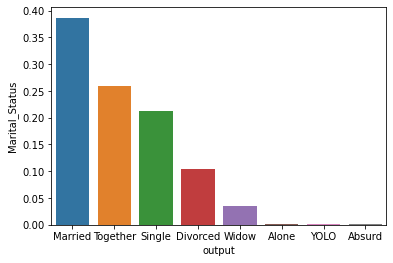

In [86]:
#Representamos esto gráficamente:
ax = sns.barplot(x="output", y= 'Marital_Status', data= pct)
plt.show()

## Descripción multivariada:

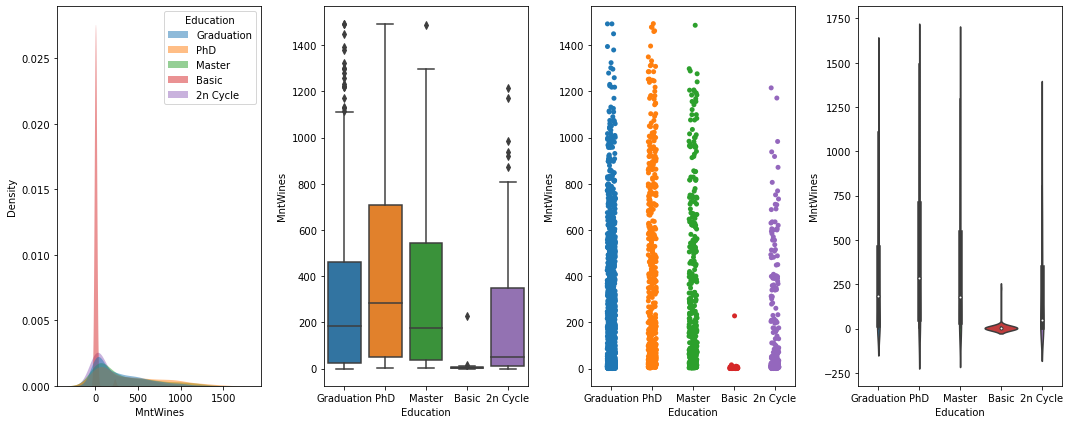

In [90]:
# Queremos representar la distribución del consumo de vino MntWines en función de la formación:

fig,axs = plt.subplots (ncols=4, figsize=(15,6))
sns.kdeplot(
    data=data, x ="MntWines", hue="Education",
    fill= True, common_norm=False,    
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y="MntWines", x="Education", ax=axs[1])
sns.stripplot(y="MntWines", data=data2,x="Education", ax=axs[2])
sns.violinplot(data=data, y="MntWines", x="Education",ax=axs[3])
fig.tight_layout()
plt.show()

**Podemos comprobar por ejemplo que las personas con una formación de PhD tienen un mayor gasto en vino que por ejemplo aquellos que tienen una formación básica cuyo consumo es mínimo**

**Puedo calcular también por ejemplo el promedio de los días de la última visita en función del estado marital:**

In [91]:
df1 = data.groupby(["Marital_Status"])["Recency"].mean()
df1

Marital_Status
Absurd      53.000000
Alone       30.333333
Divorced    49.487069
Married     48.310385
Single      49.199575
Together    49.989529
Widow       48.802632
YOLO         3.000000
Name: Recency, dtype: float64

**Vemos que es mayor en aquellos que respondieron Absurd seguidos de aquellas parejas que no se encuentran casadas y las parejas divorciadas. Siendo aquellos que respondieron YOLO los que menos tiempo hace de la última visita.**

**Puedo hacer esto mismo considerando dos variables cualitativas. Por ejemplo vamos a ver el consumo de frutas en función del status marital y el grado de educación:**

In [92]:
df = data.groupby(["Education","Marital_Status"])["MntFruits"].mean()
df

Education   Marital_Status
2n Cycle    Divorced           25.565217
            Married            27.775000
            Single             31.972222
            Together           29.160714
            Widow              55.600000
Basic       Divorced            1.000000
            Married            15.450000
            Single              9.166667
            Together            8.714286
            Widow               3.000000
Graduation  Absurd            102.000000
            Alone               7.000000
            Divorced           33.016807
            Married            29.221445
            Single             33.394309
            Together           30.028070
            Widow              31.257143
Master      Absurd             67.000000
            Alone               5.000000
            Divorced           19.675676
            Married            20.014493
            Single             20.573333
            Together           23.617647
            Widow             

**Vemos que aquellos que mayor consumo de frutas tuvieron fueron las personas que respondieron Absurd a su situación matiral junto con una formación de graduación seguidos de aquellos que eran viudos y tenían una formación de segundo ciclo:**

## Regresión:

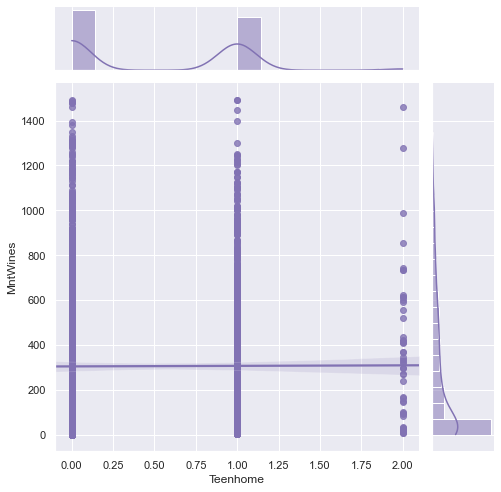

In [94]:
# A continuación vamos a ver si existe alguna relación entre el consumo de vino y el número de hijos adolescentes por ejemplo:

sns.set_theme(style="darkgrid")

tips= sns.load_dataset("tips")
g = sns.jointplot(x="Teenhome", y="MntWines", data=data,
                 kind= "reg", truncate=False,
                 color="m", height=7)

**Vemos que en este caso el consumo de vino es menor cuando hay 0 niños jóvenes seguidos de personas con 1 solo adolescente en el hogar y escaso cuando hay 2 o más adolescentes en el hogar:**

C:\Users\maric\anaconda3\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
C:\Users\maric\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\maric\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


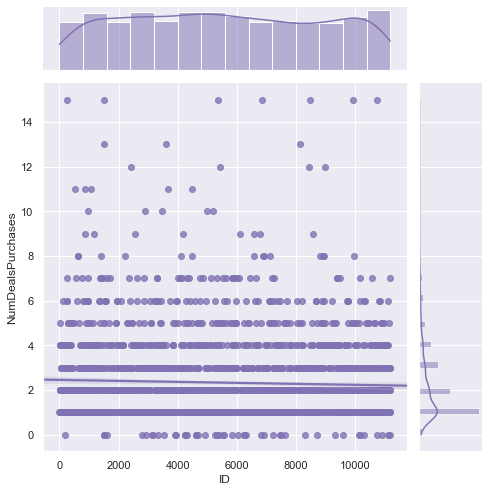

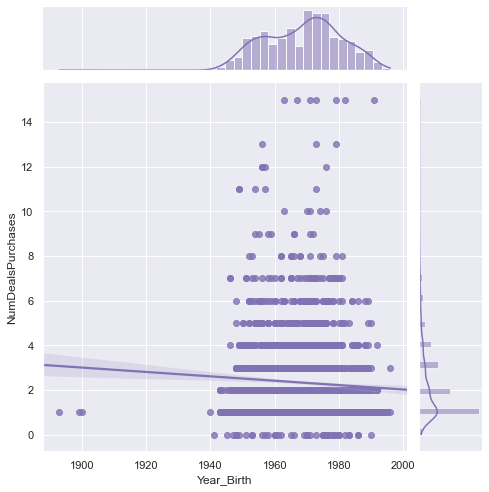

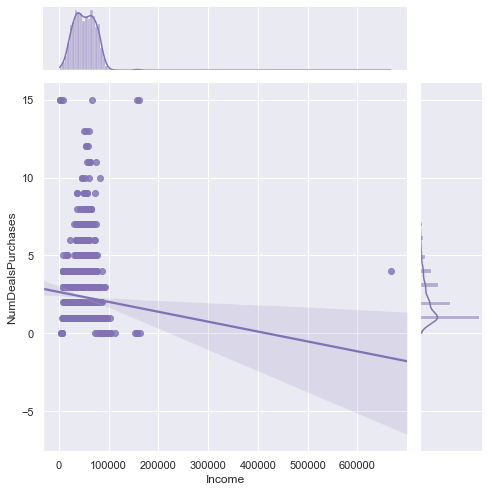

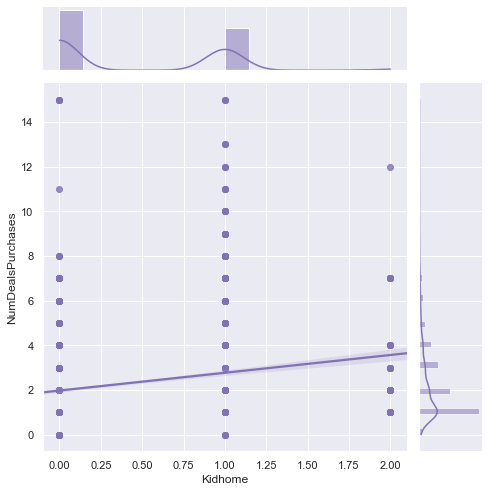

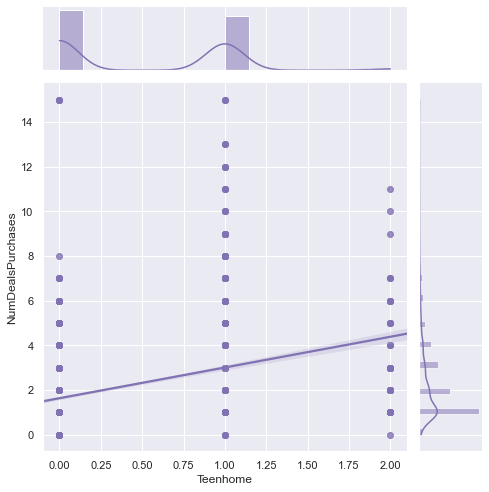

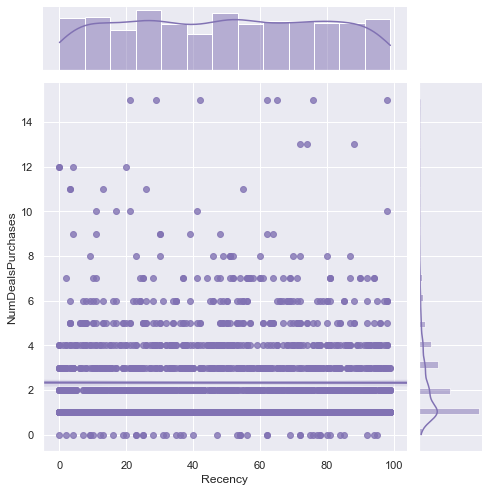

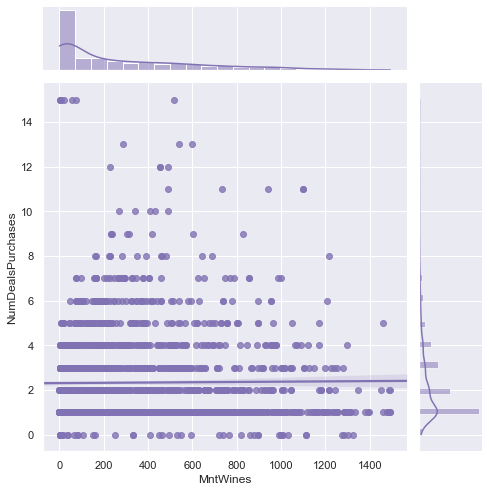

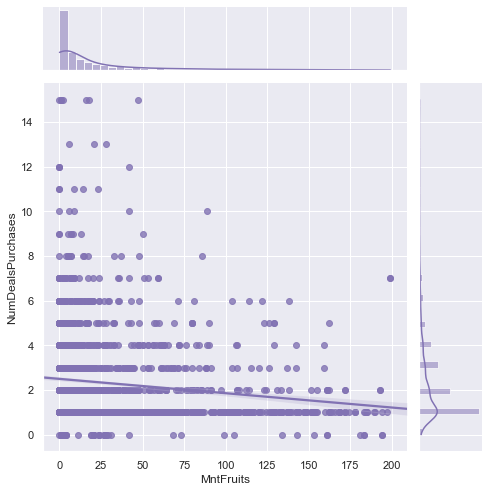

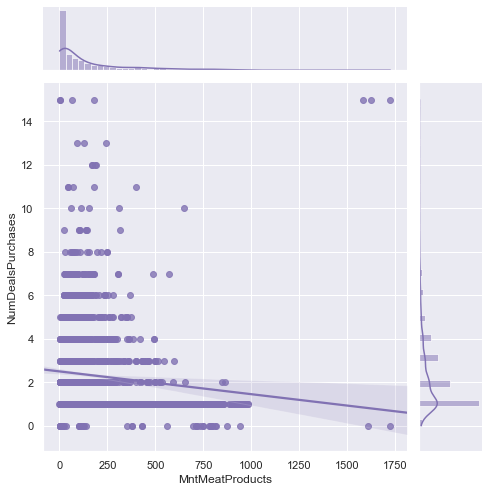

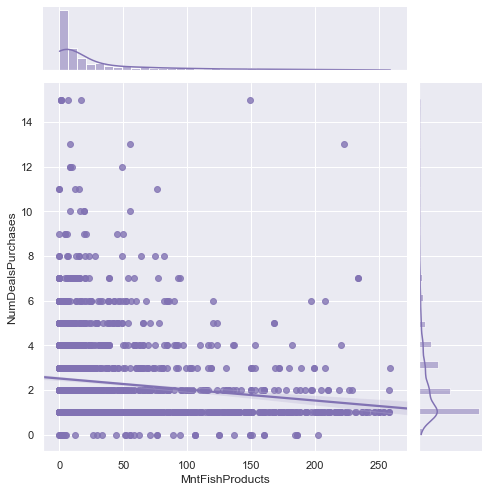

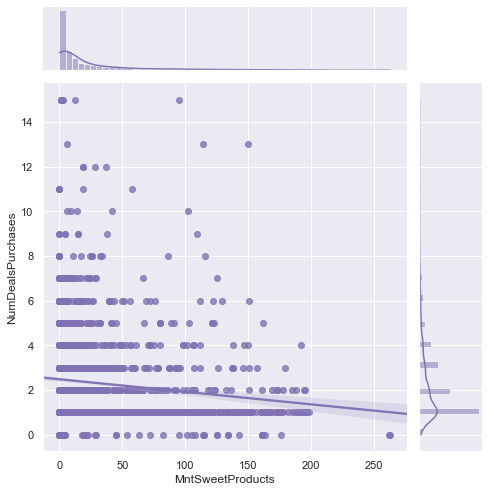

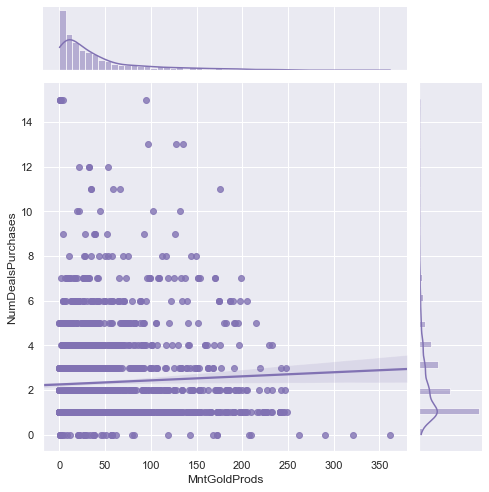

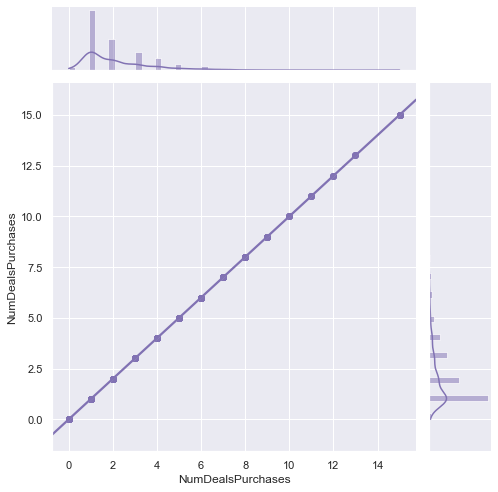

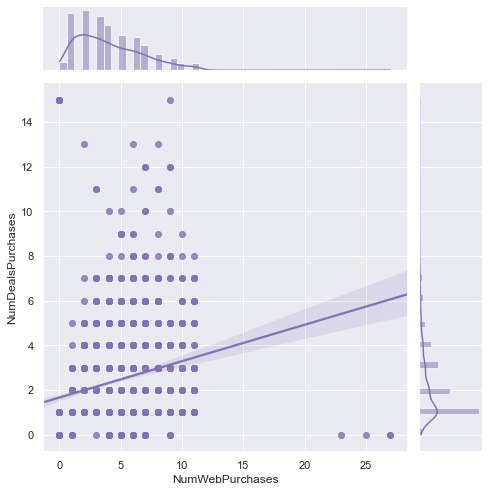

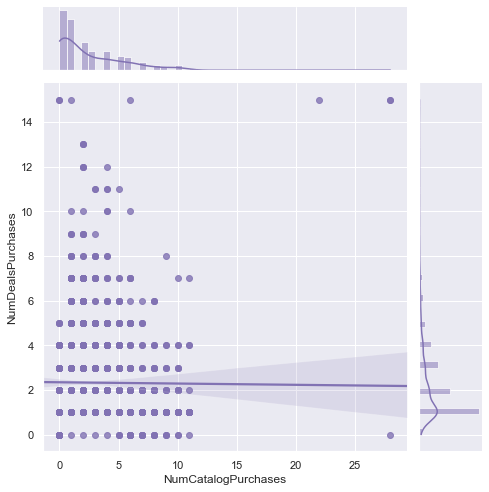

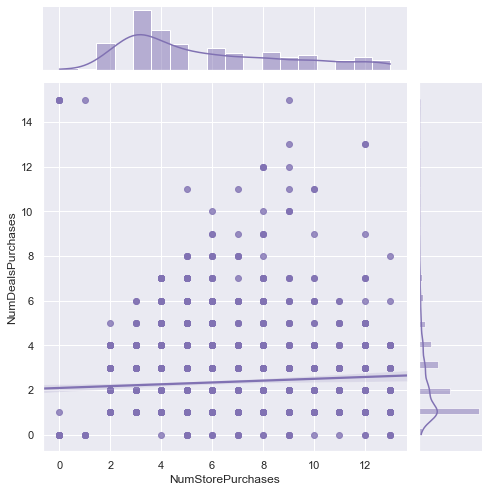

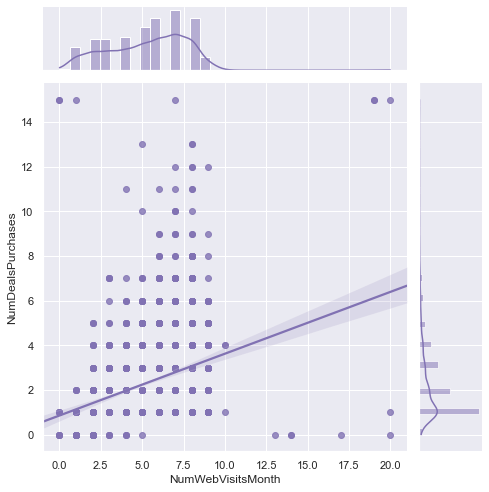

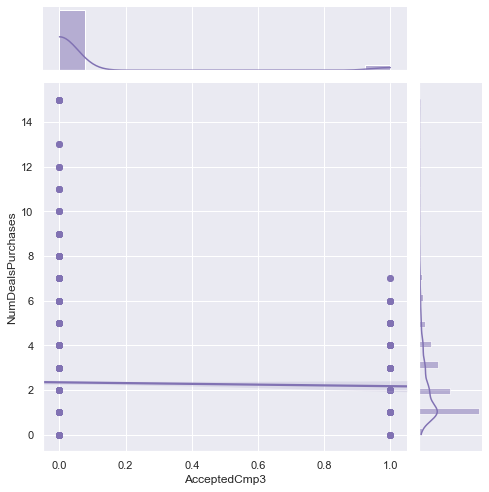

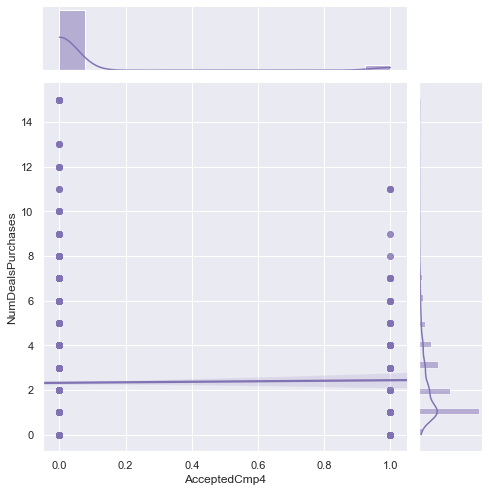

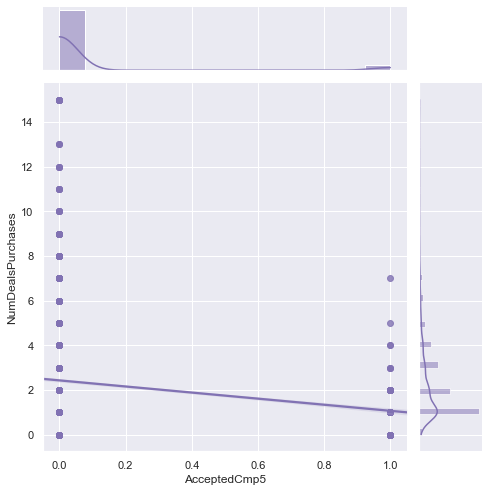

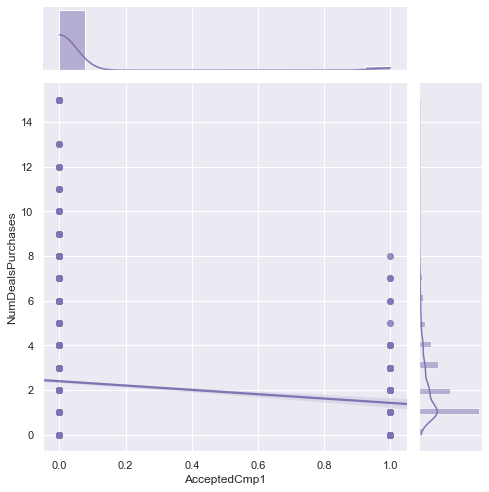

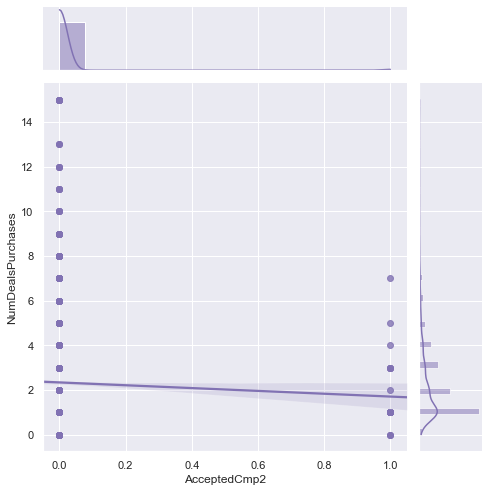

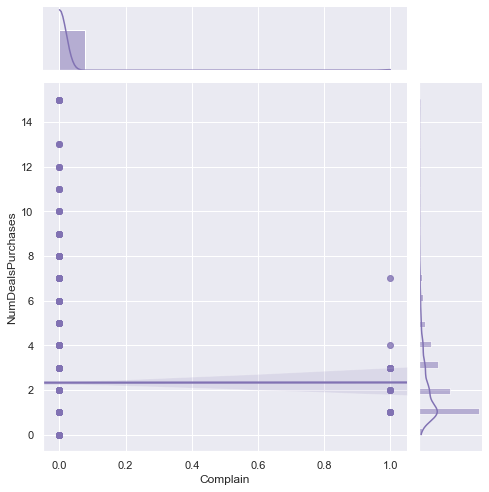

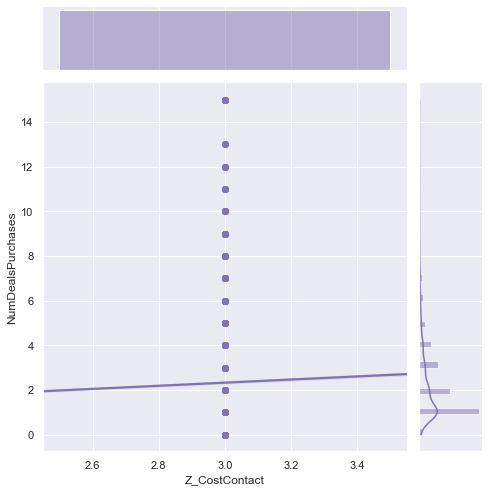

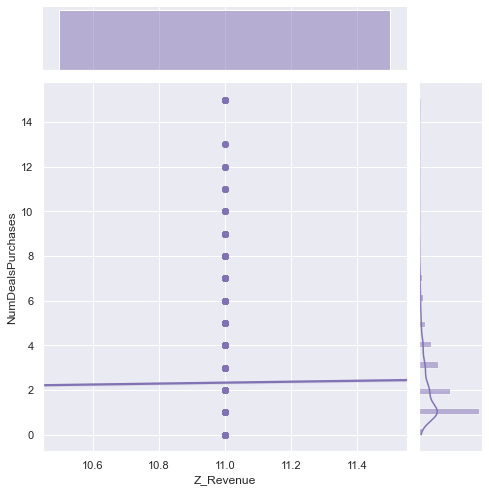

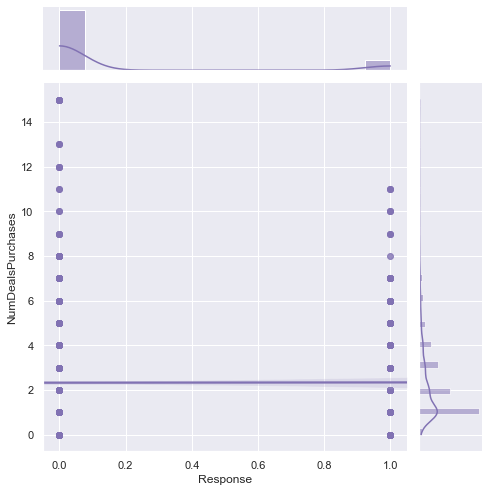

In [95]:
# Podemos estudiar por ejemplo el número de compras con ofertas en función del resto de variables cuantitativas:
for i in var_num:
    sns.set_theme(style="darkgrid")
    tips= sns.load_dataset("tips")
    g = sns.jointplot(x=i, y="NumDealsPurchases", data=data2,
                 kind= "reg", truncate=False,
                 color="m", height=7)

**En este caso no hemos encontrado una relación clara entre el número de ofertas aceptadas y el resto de factores estudiados, aunque si observamos por ejemplo que aquellos clientes que no presentaron ninguna queja durante los últimos dos años aceptaron un mayor número de ofertas que aquellos que si presentaron alguna queja**

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.002355  0.013095  0.001736 -0.003030   
Year_Birth           0.002355    1.000000 -0.161791  0.233615 -0.350791   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001736    0.233615 -0.428669  1.000000 -0.039869   
Teenhome            -0.003030   -0.350791  0.019133 -0.039869  1.000000   
Recency             -0.044376   -0.016295 -0.003970  0.011492  0.013838   
MntWines            -0.021084   -0.159451  0.578650 -0.497336  0.003747   
MntFruits            0.007326   -0.017747  0.430842 -0.373396 -0.176558   
MntMeatProducts     -0.005902   -0.033697  0.584633 -0.439261 -0.261122   
MntFishProducts     -0.023992   -0.040425  0.438871 -0.388884 -0.205242   
MntSweetProducts    -0.005936   -0.020204  0.440744 -0.378026 -0.163056   
MntGoldProds        -0.011172   -0.064208  0.325916 -0.355029 -0.019887   
NumDealsPurchases   -0.04

ValueError: 'right' is not a valid value for align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'

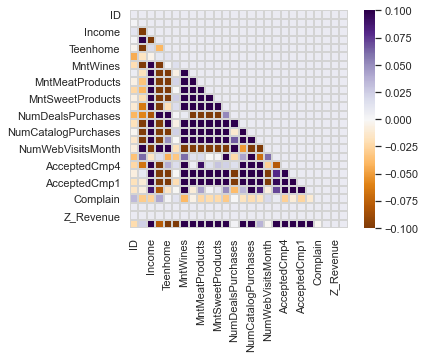

In [140]:
## Calculamos la matriz de correlación:

X_num=data.drop(var_cual,axis=1)
corr=X_num.corr()
print(corr)
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots()
vmax=np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
           square=True, linecolor="lightgray", linewidths=1, ax=ax)

for i in range (len(corr)):
    ax.text(i,len(corr),corr.columns[i],
           ha="center",va="right",rotation=90)
plt.show()